# Task description
- Classify the patent documents based on abstract
- use BERT

#Install packages

In [ ]:
!ls

sample_data


In [1]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.9 MB/s eta 0:00:00


In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CNN_sim_paper/
!pwd

/content/drive/MyDrive/CNN_sim_paper
/content/drive/MyDrive/CNN_sim_paper


In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


In [ ]:
!cp  TEST4_g1p8_2023_0801.tar.bz2 /content/

In [ ]:
!cp algo_time.m  /content/

In [ ]:
%cd /content/drive/MyDrive/
!pwd
!cp TESTTT_   ./

In [ ]:
%cd /content/
!ls

/content
drive  sample_data  TEST4_g1p8_2023_0801.tar.bz2


#Import Packages

In [2]:
# Importing stock ml libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
configuration=BertConfig()

In [ ]:
configuration

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

#Read Data

In [ ]:
df = pd.read_csv('training_speech_ai_0205.csv')

In [4]:
df=pd.read_excel('speech_training_set_0522_2023.xlsx')

In [ ]:
dft=pd.read_excel('speech_test_set_0522_2023.xlsx')

In [ ]:
dft=pd.read_excel('speech_test_set_0711_2023.xlsx')

In [3]:
dft=pd.read_excel('speech_test_set_0810_2023.xlsx')

In [5]:
df

,doc_id,grp_speech,Abstract (English)
0,20170294186,seed,A system and method for speech recognition is ...
1,20020143539,seed,Described here is a method of determining an e...
2,20030163306,seed,Information relating to an amount of muscle ac...
3,20170025119,seed,"An apparatus for calculating acoustic score, a..."
4,20140095162,seed,Improved techniques are disclosed for permitti...
...,...,...,...
15758,9116708,antiseed,A program creation support apparatus ( 100) in...
15759,7989793,antiseed,Provided are a nonvolatile memory device and a...
15760,7921437,antiseed,An optical pickup apparatus including a first ...
15761,7009074,antiseed,Acetic acid is produced by oxidation of methan...


In [6]:
dft[:20]

,doc_id,Abstract (English),predict50_speech,flag_train_speech,ai_score_speech
0,20100316293,A method for determining a signature vector of...,0,0,0.003925
1,9792424,A service receives a request from a user of a ...,0,0,0.037299
2,20050159953,A method of searching audio data is provided i...,1,0,0.999965
3,20020103646,A method and apparatus for performing text-to-...,1,0,1.000000
4,20100316300,A video that advertises a particular web site ...,0,0,0.006100
5,20060229869,Acoustic noise for wireless or landline teleph...,0,0,0.001129
6,20060167681,The present invention provides a diagnostic de...,0,0,0.001832
7,7881932,The present invention extends the VoiceXML lan...,1,0,1.000000
8,20180373715,Techniques for recommending media are describe...,0,0,0.006185
9,20150296319,An apparatus comprising: a depth map estimator...,0,0,0.002864


## How many are positive in the test set ?

In [7]:
c=0
d=0
pp=[]
for indx, pre in dft.predict50_speech.items():
  #print(pre)
  if pre==1:
    c=c+1
    #print(indx)
    #print(dft.ai_score_speech[indx])
    pp.append(dft.ai_score_speech[indx])
  elif pre==0:
    d=d+1
print("c=",c)
print("d=",d)
print("c+d:",c+d)
print(pp)
print(len(pp))

c= 441
d= 559
c+d: 1000
[0.9999647736549376, 0.999999701976776, 0.999999612569809, 0.9999200403690338, 0.9813506901264192, 0.7956592738628387, 0.9788372218608856, 0.9921707212924956, 0.9978735744953156, 0.6545868515968323, 0.7599271535873413, 0.999996304512024, 0.999997705221176, 0.9998706877231598, 0.9949208796024324, 0.999986469745636, 0.9942196607589722, 0.9873877763748168, 0.998984307050705, 0.9978184700012208, 0.7186001539230347, 0.91277614235878, 0.9999968707561492, 0.9948954582214355, 0.9946971833705902, 0.9838570952415466, 0.7204177975654602, 0.9999994337558746, 0.9979472160339355, 0.999986171722412, 0.9986522495746613, 0.996418595314026, 0.9870429039001464, 0.9999538660049438, 0.9964751303195952, 0.9950978457927704, 0.9880981743335724, 0.8845232725143433, 0.998441845178604, 0.979922354221344, 0.994706928730011, 0.999712496995926, 0.9204885959625244, 0.953585147857666, 0.9049579799175262, 0.9999945163726808, 0.9978554844856262, 0.5591663420200348, 0.9972195625305176, 0.61791884

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   doc_id              1000 non-null   int64  
 1   Abstract (English)  1000 non-null   object 
 2   predict50_speech    1000 non-null   int64  
 3   flag_train_speech   1000 non-null   int64  
 4   ai_score_speech     1000 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [ ]:
"Hey man, I'm really not trying to edit war.".split()

['Hey', 'man,', "I'm", 'really', 'not', 'trying', 'to', 'edit', 'war.']

In [ ]:
" ".join(['Hey', 'man,', "I'm", 'really', 'not', 'trying', 'to', 'edit', 'war.'])

"Hey man, I'm really not trying to edit war."

In [ ]:
test_para='A plurality of sets of circuits are provided, each of which generates an impedance code through the use of an impedance control circuit in association with a resistive element connected to an external terminal, and each of which varies the impedance in accordance with such an impedance code. The impedance control circuit includes an impedance comparator which is formed equivalently to the resistive element and the plurality of sets of circuits, and which performs an impedance comparison with each of a plurality of replica circuits to form an up signal that increases the impedance and a down signal that decreases the impedance. Counters are provided adjacent to the individuals of the plurality of sets of circuits to thereby generate the impedance codes in response to the up signal and the down signal.'

In [ ]:
test_ids=tokenizer.encode_plus(test_para,return_token_type_ids=True,pad_to_max_length=True, max_length=200)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
len(test_ids['input_ids'])

In [ ]:
type(test_ids)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
test_ids

{'input_ids': [101, 1037, 29018, 1997, 4520, 1997, 13782, 2024, 3024, 1010, 2169, 1997, 2029, 19421, 2019, 17727, 29605, 3642, 2083, 1996, 2224, 1997, 2019, 17727, 29605, 2491, 4984, 1999, 2523, 2007, 1037, 9507, 3512, 5783, 4198, 2000, 2019, 6327, 5536, 1010, 1998, 2169, 1997, 2029, 9783, 1996, 17727, 29605, 1999, 10388, 2007, 2107, 2019, 17727, 29605, 3642, 1012, 1996, 17727, 29605, 2491, 4984, 2950, 2019, 17727, 29605, 4012, 28689, 4263, 2029, 2003, 2719, 5662, 2135, 2000, 1996, 9507, 3512, 5783, 1998, 1996, 29018, 1997, 4520, 1997, 13782, 1010, 1998, 2029, 10438, 2019, 17727, 29605, 7831, 2007, 2169, 1997, 1037, 29018, 1997, 15059, 13782, 2000, 2433, 2019, 2039, 4742, 2008, 7457, 1996, 17727, 29605, 1998, 1037, 2091, 4742, 2008, 17913, 1996, 17727, 29605, 1012, 24094, 2024, 3024, 5516, 2000, 1996, 3633, 1997, 1996, 29018, 1997, 4520, 1997, 13782, 2000, 8558, 9699, 1996, 17727, 29605, 9537, 1999, 3433, 2000, 1996, 2039, 4742, 1998, 1996, 2091, 4742, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0

#Dataset

In [8]:
class CustomDataset(Dataset):

    def __init__(self, split, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment_text = self.data['Abstract (English)']
        #self.targets = dataframe['grp_speech']
        self.max_len = max_len
        self.split=split

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        if self.split=='train':
          self.targets = self.data['grp_speech']
        else:
          self.targets = self.data['predict50_speech']
        c_text = str(self.comment_text[index])
        c_text = " ".join(c_text.split())
        #print('idx:',index)
        inputs = self.tokenizer.encode_plus(
            c_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        for idx in range(0, len(self.targets)):
          if self.targets[idx]=='seed':
            self.targets[idx]=1
          elif self.targets[idx]=='antiseed':
            self.targets[idx]=0

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }
MAX_LEN = 500
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
training_set = CustomDataset('train', df, tokenizer, MAX_LEN)
testing_set = CustomDataset('test', dft, tokenizer, MAX_LEN)

In [ ]:
config = BertConfig.from_pretrained('bert-base-uncased')

In [ ]:
config

Available objects for config:
     AliasManager
     ColabHistoryManager
     DisplayFormatter
     IPCompleter
     IPKernelApp
     InlineBackend
     LoggingMagics
     MagicsManager
     OSMagics
     PrefilterManager
     ScriptMagics
     Shell
     StoreMagics


In [ ]:
type(training_set[0])

dict

In [ ]:
len(training_set)

15763

In [ ]:
testing_set[0]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'ids': tensor([  101,  1037,  4118,  2005, 12515,  1037,  8085,  9207,  1997,  1037,
          2152,  8789,  2951, 13462,  2950,  3988,  6026,  1037,  8203,  6970,
          3207, 11837,  4181,  3401,  9207,  1059, 13938,  2401,  2013,  1037,
          1037,  2275,  1060,  1997,  1050,  7953, 19019,  1997,  9812,  1040,
          1010,  2073,   100,  1010, 18154, 17739,  1037, 16745,  1055,  1997,
          1050, 19019,  2013,  2275,  1060,  1010,  2073,  1050,  2003,  2107,
          2008,  1050,  1028,  1028,  1015,  1998,  1050,  1026,  1050,  1010,
         20177,  2019,  7172,  8203,  6970,  3207, 11837,  4181,  3401,  9207,
          1059, 21693,  2401,  2013,  1059, 13938,  2401,  1517,  2047,  1027,
          1059, 21693,  2401,  1009,  1055,  1087,  1006,  2358,  1087,  1055,
          1009,  1156,  2072,  1007,  1597,  2487,  1087,  1006,  1015, 22543,
         20492,  1087,  1059, 21693,  2401,  1007,  1010,  2073,  1156,  2003,
          1037,  3180,  3989, 16381,  1010,  

In [ ]:
training_set[0]

{'ids': tensor([  101,  1037,  2291,  1998,  4118,  2005,  4613,  5038,  2003,  3024,
          1012,  7861,  5092, 21341,  2015,  2089,  2421,  4909,  2019,  5746,
          4742,  2012,  1037,  2034,  2784, 15756,  2897,  1006,  1523,  1040,
         10695,  1524,  1007,  3378,  2007,  1037,  9798,  5080,  1012,  7861,
          5092, 21341,  2015,  2089,  2582,  2421,  4909,  1996,  5746,  4742,
          2012,  1037,  2117,  2784, 15756,  2897,  1006,  1523,  1040, 10695,
          1524,  1007,  3378,  2007,  1037,  9798,  5080,  1010, 16726,  1996,
          2117,  2784, 15756,  2897,  2950,  8491, 11709,  2084,  1996,  2034,
          2784, 15756,  2897,  1012,  7861,  5092, 21341,  2015,  2089,  2036,
          2421, 12515,  3251,  2000,  7276,  2019,  6434,  2013,  1996,  2034,
          2784, 15756,  2897,  2030,  1996,  2117,  2784, 15756,  2897,  1998,
          4346,  1996,  3479,  6434,  2000,  1037, 21933,  4063,  2007,  2019,
          3452,  7863,  1997, 21485,  2039,  

In [ ]:
len(training_set[0])

4

In [ ]:
len(testing_set[0])

4

In [ ]:
training_set[0]['targets']

tensor(1.)

In [ ]:
training_set[0]['ids'].shape

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


torch.Size([200])

In [ ]:
testing_set = CustomDataset('test', dft, tokenizer, MAX_LEN)

In [ ]:
training_loader = DataLoader(training_set, **train_params)

In [ ]:
testing_loader = DataLoader(testing_set, **test_params)

NameError: ignored

In [ ]:
1970*8

15760

In [ ]:
25*8

200

In [ ]:
for x, batch in enumerate(testing_loader):
    print(x)
    if x==0:
      print(batch['ids'].shape)
      print(batch['targets'])
    if x==24:
      print(batch['ids'].shape)
      print(batch['targets'])

0
torch.Size([4, 500])
tensor([1., 1., 1., 1.])
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
torch.Size([4, 500])
tensor([1., 0., 1., 0.])
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [ ]:
print(batch['ids'].shape)

torch.Size([3, 200])


In [ ]:
data=next(iter(training_loader))

In [ ]:
data['ids'].shape

torch.Size([8, 200])

In [ ]:
data['ids'][0,:]

tensor([  101,  1050,  1011,  1006, 18479, 18037,  2389,  3683, 18037,  1007,
        17666,  6850, 24432,  2063, 27790,  2869,  2024,  4810,  2011, 24868,
         1996,  7978,  1050,  1011, 23060,  8516,  7328,  2007,  1037,  2566,
        28479,  2030,  7554, 18479,  4842, 28479,  1998,  1037, 26244,  3815,
         1997,  1037,  3384,  5474,  2030,  3384,  1011, 27854,  3375,  1999,
         2019,  6544, 23735,  1012,  2122,  1050,  1011,  1006, 18479, 18037,
         2389,  3683, 18037,  1007, 17666,  6850, 24432,  2229,  2024,  3391,
         6179,  2004, 27790,  2869,  2005, 26572,  9890, 16294,  2015,  1010,
         1996, 10867,  7361, 28723, 26572,  9890, 16294,  2015,  1998, 12945,
        18898,  9265,  1012,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
data['targets']

tensor([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
data['token_type_ids'].shape

torch.Size([8, 200])

## Dataloader
- Split dataset into training dataset and validation dataset.
- Create dataloader to iterate the data.

In [9]:
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

#Model

In [ ]:
moda=transformers.BertModel.from_pretrained('bert-base-uncased',return_dict=False)

In [ ]:
config.output_hidden_states

In [ ]:
moda.config.output_hidden_states

False

In [ ]:
moda.config.use_cache

True

In [ ]:
moda.config.max_length

20

In [ ]:
moda.config.output_attentions

False

In [ ]:
type(moda.config)

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "return_dict": false,
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [10]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased',return_dict=False)
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 1)

    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids)
        #print(output_1.shape)
        #print(_.shape)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

model = BERTClass()
model.to(device)

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [ ]:
model

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

#Training

In [11]:
outs=torch.randn(3, requires_grad=True)
print(outs)

tensor([-0.9250, -0.2926, -0.3124], requires_grad=True)


In [12]:
m = torch.nn.Sigmoid()
m(outs)

tensor([0.2839, 0.4274, 0.4225], grad_fn=<SigmoidBackward0>)

In [13]:
torch.log(m(outs))

tensor([-1.2590, -0.8501, -0.8615], grad_fn=<LogBackward0>)

In [14]:
torch.log(1-m(outs))

tensor([-0.3340, -0.5575, -0.5491], grad_fn=<LogBackward0>)

In [17]:
    (-0.5491-0.8501-0.3340)/3

-0.5777333333333333

In [ ]:
(-1.0289-0.3110 -0.1021)/3

-0.48066666666666663

In [15]:
target=torch.empty(3).random_(2)
print(target)

tensor([0., 1., 0.])


In [16]:
torch.nn.BCEWithLogitsLoss()(outs, target)

tensor(0.5777, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [19]:
# hyperparameters
EPOCHS = 1
LEARNING_RATE = 1e-05

BCEWithLogitsLoss(): assume model output without sigmoid.    Will add sigmoid automatically

In [20]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def train(epoch):
    model.train()
    cc=0
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)
        print('target:',targets.shape)
        print(targets)
        #print(ids.shape)
        outputs = model(ids, mask, token_type_ids)
        #print(outputs.shape)
        print(outputs)
        outputs=outputs.squeeze()
        print(outputs.shape)
        print(outputs)
        #optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%100==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
            cc=cc+1
            print('cc:',cc)
        #update model
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

target: torch.Size([8])
tensor([0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
tensor([[-1.0061],
        [-1.1518],
        [-1.0033],
        [-0.7112],
        [-0.8341],
        [-0.7612],
        [-0.9949],
        [-0.6695]], device='cuda:0', grad_fn=<AddmmBackward0>)
torch.Size([8])
tensor([-1.0061, -1.1518, -1.0033, -0.7112, -0.8341, -0.7612, -0.9949, -0.6695],
       device='cuda:0', grad_fn=<SqueezeBackward0>)
Epoch: 0, Loss:  0.34626322984695435
cc: 1
target: torch.Size([8])
tensor([0., 0., 0., 0., 0., 0., 0., 1.], device='cuda:0')
tensor([[-0.8775],
        [-1.1199],
        [-1.0421],
        [-0.7195],
        [-0.8412],
        [-0.9619],
        [-1.1024],
        [-0.7078]], device='cuda:0', grad_fn=<AddmmBackward0>)
torch.Size([8])
tensor([-0.8775, -1.1199, -1.0421, -0.7195, -0.8412, -0.9619, -1.1024, -0.7078],
       device='cuda:0', grad_fn=<SqueezeBackward0>)
target: torch.Size([8])
tensor([0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
tensor([[-0.7509],
  

KeyboardInterrupt: ignored

In [ ]:
15763/8

1970.375

In [ ]:
15763/800

19.70375

In [ ]:
def validation(epoch):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            #print(targets.shape)
            #print(targets)
            outputs = model(ids, mask, token_type_ids)
            #print(outputs.shape)
            #print(outputs)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            #print(fin_targets)
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
            #print(fin_outputs)
    return fin_outputs, fin_targets

In [ ]:
p = np.zeros((4))
print(p)

[0. 0. 0. 0.]


In [ ]:
pp=np.zeros(5)
print(pp)
for i in range(5):
  print(i)

[0. 0. 0. 0. 0.]
0
1
2
3
4


In [ ]:
c=0
d=0
pp=[]
for indx, pre in dft.predict50_speech.items():
  #print(pre)
  if pre==1:
    c=c+1
    #print(indx)
    #print(dft.ai_score_speech[indx])
    pp.append(dft.ai_score_speech[indx])
  elif pre==0:
    d=d+1
print("c=",c)
print("d=",d)
print("c+d:",c+d)
print(pp)
print(len(pp))

c= 441
d= 559
c+d: 1000
[0.9999647736549376, 0.999999701976776, 0.999999612569809, 0.9999200403690338, 0.9813506901264192, 0.7956592738628387, 0.9788372218608856, 0.9921707212924956, 0.9978735744953156, 0.6545868515968323, 0.7599271535873413, 0.999996304512024, 0.999997705221176, 0.9998706877231598, 0.9949208796024324, 0.999986469745636, 0.9942196607589722, 0.9873877763748168, 0.998984307050705, 0.9978184700012208, 0.7186001539230347, 0.91277614235878, 0.9999968707561492, 0.9948954582214355, 0.9946971833705902, 0.9838570952415466, 0.7204177975654602, 0.9999994337558746, 0.9979472160339355, 0.999986171722412, 0.9986522495746613, 0.996418595314026, 0.9870429039001464, 0.9999538660049438, 0.9964751303195952, 0.9950978457927704, 0.9880981743335724, 0.8845232725143433, 0.998441845178604, 0.979922354221344, 0.994706928730011, 0.999712496995926, 0.9204885959625244, 0.953585147857666, 0.9049579799175262, 0.9999945163726808, 0.9978554844856262, 0.5591663420200348, 0.9972195625305176, 0.61791884

In [ ]:
names = ["John", "Jane", "Doe"]
enumNames = enumerate(names)

for inx,item in enumNames:
    print(inx,item)

0 John
1 Jane
2 Doe


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pp=[]
pp0=[]
c=0
cc=0
dd=0
d=0
for epoch in range(EPOCHS):
    outputs, targets = validation(epoch)
    #print(len(outputs))
    #print(outputs)
    pred=np.array(outputs)
    #print(pred.shape)
    num_sample=len(targets)
    #print(targets)
    #print(num_sample)
    enumNames = enumerate(targets)
    for inx,item in enumNames:
      if item==1.0:
        pp.append(pred[inx,0])
        c=c+1
        if pred[inx,0]>0.5:
            cc=cc+1
    # pp: Among the positive ones from USPTO, collect their BERT output pred
    #print(pp)
    print('positive ones from USPTO:',c)
    print('BERT output >0.5 among positive', c, 'ones from USPTO:',cc)

    enumNames = enumerate(targets)
    for inx,item in enumNames:
      if item==0.0:
        pp0.append(pred[inx,0])
        d=d+1
        if pred[inx,0]<0.5:
          dd=dd+1
    # pp0: Among the negative zeros from USPTO, collect their BERT output pred
    #print(pp0)
    print('negative zeros from USPTO:',d)
    print('BERT output < 0.5 among negative zeros from USPTO',dd)
    #plt.hist(pp,bins=200)
    #plt.hist(pp0,bins=100)
    p=np.zeros(num_sample)
    for i in range(0,1000):
      if pred[i,0]>0.5:
        p[i]=1
      else:
        p[i]=0
    print("Accuracy: "  + str(np.mean((p[:] == targets[:]))))
    outputs = np.array(outputs) >= 0.5
    accuracy = metrics.accuracy_score(targets, outputs)
    f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
    f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
    print(f"Accuracy Score = {accuracy}")
    print(f"F1 Score (Micro) = {f1_score_micro}")
    print(f"F1 Score (Macro) = {f1_score_macro}")
#plt.hist(pp,bins=200)
#plt.hist(pp0,bins=200)

positive ones from USPTO: 441
BERT output >0.5 among positive 441 ones from USPTO: 390
negative zeros from USPTO: 559
BERT output < 0.5 among negative zeros from USPTO 394
Accuracy: 0.784
Accuracy Score = 0.784
F1 Score (Micro) = 0.7840000000000001
F1 Score (Macro) = 0.7839965439447032


In [ ]:
392/441

0.8888888888888888

In [ ]:
326/559

0.5831842576028623

In [ ]:
len(pp)

441

(array([ 17.,   4.,   2.,   2.,   1.,   1.,   3.,   1.,   2.,   1.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,
          1.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   2.,   0.,
          1.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,
          2.,   2.,   1.,   0.,   2.,   6.,   3.,   1.,   2.,   2.,   5.,
          2.,   2.,   6.,   6.,   1.,   2.,   1.,   4.,   2.,   4.,   5.,
          8.,   3.,  12.,   7.,   5.,   9.,   7.,   7.,  16.,  23.,  36.,
        182.]),
 array([4.54385212e-04, 1.04318151e-02, 2.04092450e-02, 3.03866750e-02,
        4.03641049e-02, 5.03415348e-02, 6.03189647e-02, 7.02963946e-02,
        8.02738245e-02, 9.02512544e-02, 1.00228684e-01, 1.10206114e-01,
        1.20183544e-01, 1.30160974e-01, 1.40138404e-01, 1.50115834e-01,
        1.60093264e-01, 1.7007

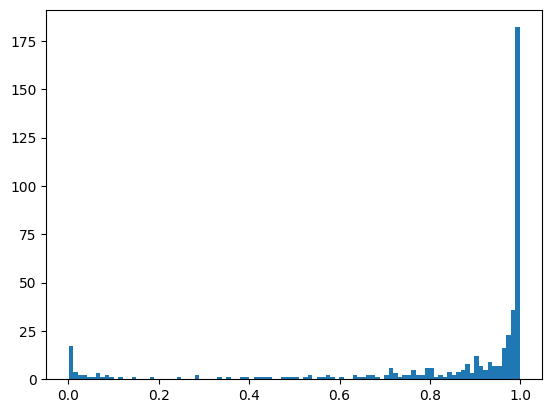

In [ ]:
plt.hist(pp,bins=100)
#plt.hist(pp0,bins=100)

(array([202.,  23.,  16.,  11.,   7.,   3.,   5.,   3.,   3.,   2.,   3.,
          1.,   0.,   3.,   2.,   1.,   1.,   4.,   5.,   2.,   2.,   2.,
          1.,   0.,   5.,   0.,   1.,   3.,   4.,   2.,   1.,   0.,   0.,
          0.,   1.,   2.,   3.,   1.,   2.,   1.,   0.,   1.,   2.,   1.,
          0.,   0.,   1.,   1.,   1.,   4.,   1.,   0.,   2.,   2.,   3.,
          0.,   1.,   1.,   1.,   4.,   0.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   1.,   1.,   3.,   0.,   4.,   3.,   3.,   1.,
          0.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,
          3.,   2.,   0.,   1.,   1.,   0.,   2.,   0.,   1.,   1.,   2.,
          2.,   0.,   0.,   3.,   0.,   3.,   1.,   2.,   0.,   0.,   2.,
          0.,   1.,   3.,   2.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.,   1.,   3.,   1.,   0.,   1.,   1.,   4.,   3.,   2.,   0.,
          0.,   0.,   1.,   2.,   0.,   2.,   1.,   3.,   0.,   3.,   3.,
          2.,   2.,   0.,   1.,   2., 

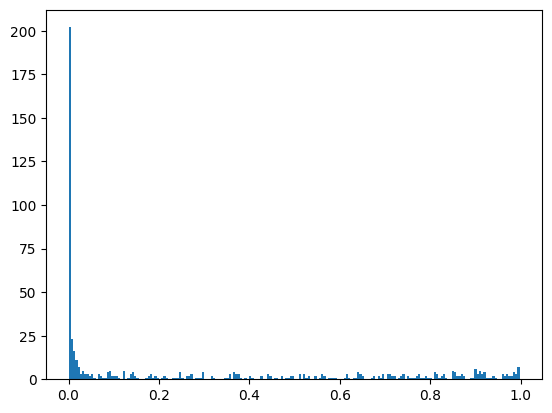

In [ ]:
plt.hist(pp0,bins=200)

In [ ]:
399/441

0.9047619047619048

In [ ]:
328/559

0.5867620751341681

(array([79., 30.,  9., 20., 17.,  6.,  7.,  8.,  8.,  4.,  3.,  7.,  2.,
         5.,  8.,  5.,  3.,  7.,  2.,  4.,  1.,  1.,  0.,  1.,  1.,  1.,
         2.,  1.,  1.,  4.,  1.,  3.,  3.,  2.,  1.,  4.,  0.,  6.,  0.,
         1.,  2.,  2.,  1.,  1.,  1.,  3.,  5.,  1.,  0.,  1.,  0.,  2.,
         1.,  2.,  0.,  0.,  0.,  3.,  0.,  3.,  1.,  1.,  2.,  0.,  2.,
         1.,  0.,  4.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  2.,  0.,  1.,  1.,
         1.,  2.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  1.,  4.,  1.,  3.,  0.,  2.,  2.,  2.,  0.,  1.,  7.,  4.,
         3.,  0.,  0.,  0.,  1.,  2.,  1.,  3.,  2.,  0.,  2.,  2.,  0.,
         0.,  0.,  1.,  4.,  1.,  1.,  2.,  1.,  2.,  2.,  4.,  0.,  1.,
         0.,  0.,  2.,  1.,  2.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,
         0.,  1.,  1.,  3.,  2.,  3.,  0.,  2.,  0.,  1.,  1.,  2.,  1.,
         4.,  0.,  0.,  3.,  1.,  0.,  1.,  5.,  0.

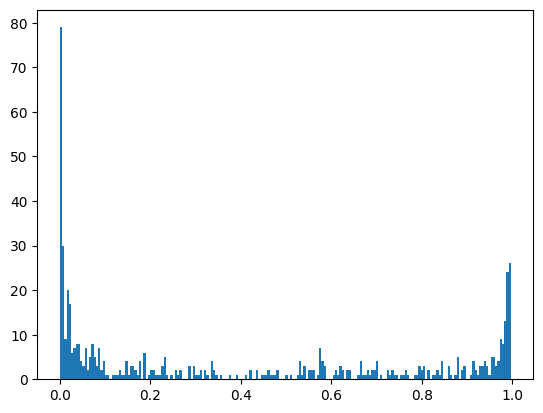

In [ ]:
plt.hist(pp0,bins=200)

(array([ 2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 41.]),
 array([0.00107181, 0.01104934, 0.02102687, 0.03100441, 0.04098194,
        0.05095947, 0.060937  , 0.07091453, 0.08089207, 0.0908696 ,
        0.10084713, 0.11082466, 0.12080219, 0.13077973, 0.14075726,
        0.15073479, 0.16071232, 0.17068986, 0.18066739, 0.19064492,
        0.20062245, 0.21059998, 0.22057752, 0.23055505, 0.24053258,
        0.25051011, 0.26048764, 0.27046518, 0.28044271, 0.29042024,
        0.30039777, 0.3103

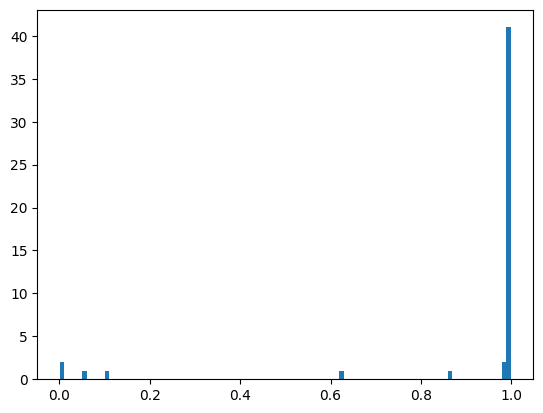

In [ ]:
plt.hist(pp,bins=100)

(array([10.,  1.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  4., 12.]),
 array([7.90838676e-04, 1.07687229e-02, 2.07466072e-02, 3.07244914e-02,
        4.07023757e-02, 5.06802599e-02, 6.06581442e-02, 7.06360284e-02,
        8.06139127e-02, 9.05917969e-02, 1.00569681e-01, 1.10547565e-01,
        1.20525450e-01, 1.30503334e-01, 1.40481218e-01, 1.50459102e-01,
        1.60436987e-01, 1.70414871e-01, 1.80392755e-01, 1.90370639e-01,
        2.00348524e-01, 2.10326408e-01, 2.20304292e-01, 2.30282176e-01,
  

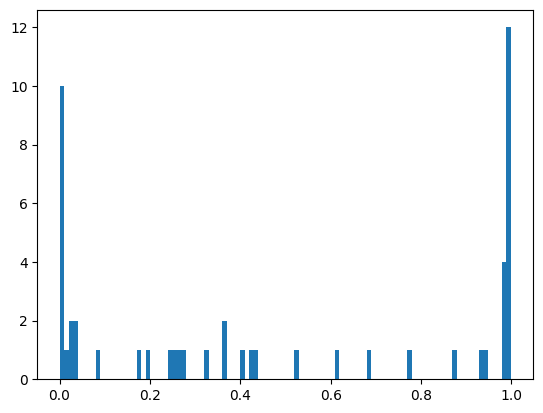

In [ ]:
plt.hist(pp0,bins=100)

In [ ]:
pred

array([[9.98127282e-01],
       [9.84062374e-01],
       [9.98742640e-01],
       [9.95566905e-01],
       [6.11539721e-01],
       [9.97954249e-01],
       [1.09326452e-01],
       [9.98654366e-01],
       [9.35995936e-01],
       [7.90838676e-04],
       [2.28377525e-03],
       [8.61724079e-01],
       [9.97933865e-01],
       [9.98808384e-01],
       [4.34636056e-01],
       [9.98199940e-01],
       [5.95619110e-03],
       [9.88349557e-01],
       [9.97245550e-01],
       [9.97431099e-01],
       [9.98307347e-01],
       [9.98588979e-01],
       [9.83958721e-01],
       [9.71065462e-03],
       [9.95825410e-01],
       [2.87690256e-02],
       [4.03366089e-01],
       [9.98723209e-01],
       [9.98364151e-01],
       [9.98790681e-01],
       [5.28683543e-01],
       [9.96846974e-01],
       [9.83557999e-01],
       [6.79622829e-01],
       [9.98592556e-01],
       [9.98565137e-01],
       [9.98825014e-01],
       [9.98533845e-01],
       [9.92917955e-01],
       [9.98372376e-01],


In [ ]:
targets

[0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0]

In [ ]:
outputs

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [ ]:
!pwd
!ls


/content
patent_classification  speech_test_set_0522_2023.xlsx
sample_data	       speech_training_set_0522_2023.xlsx
